In [3]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [5]:
# We will only use two classes and two features for simplicity
df = df[df['target'] != 2]
X = df[['sepal length (cm)', 'sepal width (cm)']]
y = df['target']

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Create the Logistic Regression model
model = LogisticRegression()

In [8]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


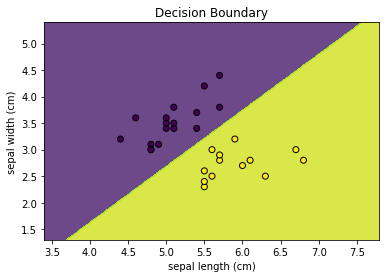

In [13]:
# Function to plot decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    #Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(pd.DataFrame(grid, columns=X.columns)) # Use DataFrame with columns
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.title("Decision Boundary")
    plt.show()

plot_decision_boundary(X_test, y_test, model)

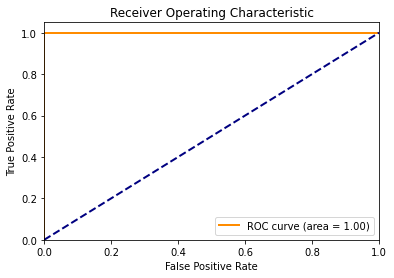

In [11]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()